Name: Haikoo Ashok Khandor <br>
Roll number: 20110071

## Pip installs

In [1]:
%pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [2]:
# Necessary Imports
import jax
import jax.numpy as jnp
from sympy import diff, sin, exp 
from sympy.abc import x,y 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

---

**Q1.** How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

The resultant matrix has the dimensions $n \times m$. <br>
Thus for each entry(total $n \times m$), $k$ multiplications will be performed. For Addition, again for each entry(total $n \times m$), $k-1$ additions will be performed. 

Multiplication: $n\times m\times k$


Addition: $n\times m\times (k-1)$

For multiplication each row has $k$ elements whereas the column of the second matrix also contains $k$ elements so there k multiplications. As for addition there are now $k$ numbers to be added, we know that the number of additions is simply one less than the total number of numbers hence $k-1$.

---

**Q2.** Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [3]:
n = 7
k = 10
m = 9
A = np.random.randint(low = -5000, high = 5000, size=(n,k)) # Matrix-1
B = np.random.randint(low = -5000, high = 5000, size=(k,m)) # Matrix-2
C = np.zeros((n,m)) # Matrix-3
# time module returns the time in nanoseconds so we multiply it by 10^6 to report the time in miliseconds

In [4]:
# List of Lists method
def multiply_mat(m1,m2):
  for i in range(0, n):
      for j in range(0, m):
          for l in range(0, k):
              C[i][j] += m1[i][l]*m2[l][j]

In [5]:
tot_time = 0 
time_square = 0 
for i in range(5000): # 5000 iterations
  start = time.perf_counter()
  multiply_mat(A,B)
  end = time.perf_counter()
  tot_time += end-start
  time_square += (end-start)**2

In [6]:
mean_time = tot_time/5000 # Taking mean
mean_square = time_square/5000 
std = np.sqrt((mean_square - mean_time**2))*(10**6) # Finding the standard deviation in miliseconds
mean_time = mean_time*(10**6) # Finding the mean/expectation in miliseconds
print(f" The mean time for the list of list matrix multiplication method is {str(mean_time)} milliseconds")
print(f" The standard deviation for the list of list matrix multiplication method is {str(std)} milliseconds")

 The mean time for the list of list matrix multiplication method is 783.8477912031522 milliseconds
 The standard deviation for the list of list matrix multiplication method is 354.570384799393 milliseconds


In [7]:
time_arr = np.zeros((5000,))
for i in range(5000): # 5000 iterations
  start1 = time.perf_counter()
  temp = np.matmul(A,B)
  end1 = time.perf_counter()
  time_arr[i] = end1 - start1
print(f"The mean time for inbuilt numpy matrix multiplication is {str(time_arr.mean()*(10**6))} milliseconds")
print(f"The standard deviation for inbuilt numpy matrix multiplication is {str(time_arr.std()*(10**6))} milliseconds")

The mean time for inbuilt numpy matrix multiplication is 3.92115939539508 milliseconds
The standard deviation for inbuilt numpy matrix multiplication is 9.058800918427334 milliseconds


Numpy matmul is quite faster than the list of lists methods because of these reasons:

1. The trivial list of lists algorithm uses three for loops that is O($n^3$). Thus it scales cubic with respect to n so scales poorly.
2. Numpy is built in C and converts its internal data to ctypes. Contrary to NumPy, lists do not provide vectorized operations like element-wise addition and multiplication.

Reference: 

https://stackoverflow.com/questions/42227432/why-is-it-that-np-dot-is-so-much-faster-than-finding-the-dot-product-using-for-l#:~:text=Because%20np.,faster%20than%20the%20Python%20interpreter

---

**Q3.** Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In order to find the median, for the worst case, it may take us atmost $n/2$ tries to find the median. Each pass involves iterating through the entire array again in the worst case which amounts to a time complexity of O($n$) which multiplies to give O($n^2$). This is the trivial or brute force approach.

A better method maybe sorting the array first. This takes O($nlog(n)$) time. After sorting we know that if there are odd number of elements in the array, the median is at index $n//2 +1$ i.e. arr[$n//2 +1$]. On the other hand if it has even number of elements then it is the average of elements at indexes $n//2$ and $n//2 +1$ i.e. arr[$n//2$] and arr[$n//2 +1$].

Numpy median has an average time complexity of O($n$).

Ref:

https://stackoverflow.com/questions/50899486/why-does-numpy-median-scale-so-well



In [8]:
# O(n^2)
np.random.seed(0)
A = list(np.random.randint(low = 1, high = 20, size = (10,))) # array consisting of numbers from 1 to 20 picked randomly 10 times
def med_brute(a):
  n = len(a)
  if(n%2==0):
    passes = n//2 # passes of the array
    while(passes>=0):
      p = 0
      for i in range(len(a)):
        if(a[i]>p):
          p = a[i]
      a.remove(p) # removing highest element
      if passes==1:
        q = p # storing for last two elements
      passes-=1
    return (p+q)/2 # even so average
  else:
    passes = n//2 -1
    while(passes>=0):
      p = 0
      for i in range(len(a)):
        if(a[i]>p):
          p = a[i]
      a.remove(p) # removing highest element
      passes-=1
    return p # odd so we get only one element as the median
med = med_brute(A)
print(med)

7.5


In [9]:
np.random.seed(0)
A = list(np.random.randint(low = 1, high = 20, size = (10,))) # array consisting of numbers from 1 to 20 picked randomly 10 times
def med_sort(a):
  a = sorted(a) # sorted array now
  n = len(a)
  if(n%2==0): # odd and even
    return ((a[n//2-1]+a[n//2])/2)
  else:
    return a[n//2-1]
med = med_sort(A)
print(med)

7.5


In [10]:
np.random.seed(0)
A = list(np.random.randint(low = 1, high = 20, size = (10,)))
print(np.median(A))

7.5


In [15]:
# Time Analysis between the three functions
# seed is kept as 0 before each list for same array 
time1 = np.zeros((2000,)) # storing the time 
time2 = np.zeros((2000,)) 
time3 = np.zeros((2000,)) 

for i in range(2000): # 2000 interations
  # brute-force
  np.random.seed(0)
  a = list(np.random.randint(low = 1, high = 5000, size = (200,))) # array consisting of numbers from 1 to 5000 picked randomly 200 times
  start1 = time.perf_counter()
  med_brute(a)
  end1 = time.perf_counter()
  time1[i] = end1 - start1
  # sorting approach
  np.random.seed(0)
  a = list(np.random.randint(low = 1, high = 5000, size = (200,))) # array consisting of numbers from 1 to 5000 picked randomly 200 times
  start2 = time.perf_counter()
  med_sort(a)
  end2 = time.perf_counter()
  time2[i] = end2 - start2
  # numpy median approach
  np.random.seed(0)
  a = list(np.random.randint(low = 1, high = 5000, size = (200,))) # array consisting of numbers from 1 to 5000 picked randomly 200 times
  start3 = time.perf_counter()
  np.median(a)
  end3 = time.perf_counter()
  time3[i] = end3 - start3

print(f"The mean time for brute force O(n^2) approach is {str(time1.mean()*(10**6))} milliseconds.")
print(f"The standard deviation for brute force O(n^2) approach is {str(time1.std()*(10**6))} milliseconds.")

print(f"The mean time for sorting O(nlog(n)) approach is {str(time2.mean()*(10**6))} milliseconds.")
print(f"The standard deviation for sorting O(nlog(n)) approach is {str(time2.std()*(10**6))} milliseconds.")

print(f"The mean time for numpy inbuilt median approach is {str(time3.mean()*(10**6))} milliseconds.")
print(f"The standard deviation for numpy inbuilt median approach is {str(time3.std()*(10**6))} milliseconds.")

The mean time for brute force O(n^2) approach is 1351.9016324917175 milliseconds.
The standard deviation for brute force O(n^2) approach is 424.4859266464988 milliseconds.
The mean time for sorting O(nlog(n)) approach is 46.33074801040493 milliseconds.
The standard deviation for sorting O(nlog(n)) approach is 62.82980611192418 milliseconds.
The mean time for numpy inbuilt median approach is 68.2614824763732 milliseconds.
The standard deviation for numpy inbuilt median approach is 51.59261558799709 milliseconds.


---

**Q4.** What is the gradient of the following function with respect to x and y? <br>
  $ x^{2}y + y^{3}sin(x) $


**A4.** 
The Gradient of the following function with respect to **x** is given by: $2xy + y^3cos(x) $

The Gradient of the following function with respect to **y** is given by: $x^2 + 3y^2sin(x) $

---

**Q5.**Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [53]:
# definition of the polynomial into consideration, it returns the value of the function and accepts the input of the value of the variables
def poly(f):
  return (f[0]**2)*(f[1]) + (f[1]**3)*jnp.sin(f[0])

f_init_1 = jnp.array([jnp.pi, 6.0]) # Random initial values
f_init_2 = jnp.array([jnp.pi*2, 7.0]) # Random initial values
f_init_3 = jnp.array([jnp.pi*5, 2.0]) # Random initial values

grad_x = jax.grad(poly) # Calculates the gradient of the function with respect to x and y both together

print(f"Gradient with respect to x is: {grad_x(f_init_1)[0]} and with respect to y is: {grad_x(f_init_1)[1]} [Using Jax inbuilt function grad]")
print(f"Gradient with respect to x is: {(2*(f_init_1[0])*(f_init_1[1])+(f_init_1[1]**3)*(jnp.cos(f_init_1[0])))} and with respect to y is: {(f_init_1[0]**2+(3*(f_init_1[1]**2))*(jnp.sin(f_init_1[0])))} [Manual calculation of gradient by putting initial values in the gradient]")
print(f"Gradient with respect to x is: {grad_x(f_init_2)[0]} and with respect to y is: {grad_x(f_init_2)[1]} [Using Jax inbuilt function grad]")
print(f"Gradient with respect to x is: {(2*(f_init_2[0])*(f_init_2[1])+(f_init_2[1]**3)*(jnp.cos(f_init_2[0])))} and with respect to y is: {(f_init_2[0]**2+(3*(f_init_2[1]**2))*(jnp.sin(f_init_2[0])))} [Manual calculation of gradient by putting initial values in the gradient]")
print(f"Gradient with respect to x is: {grad_x(f_init_3)[0]} and with respect to y is: {grad_x(f_init_3)[1]} [Using Jax inbuilt function grad]")
print(f"Gradient with respect to x is: {(2*(f_init_3[0])*(f_init_3[1])+(f_init_3[1]**3)*(jnp.cos(f_init_3[0])))} and with respect to y is: {(f_init_3[0]**2+(3*(f_init_3[1]**2))*(jnp.sin(f_init_3[0])))} [Manual calculation of gradient by putting initial values in the gradient]")
print("Hence gradient evaluated by our method is equal to that of the analytical solution.")

Gradient with respect to x is: -178.30088806152344 and with respect to y is: 9.869595527648926 [Using Jax inbuilt function grad]
Gradient with respect to x is: -178.30088806152344 and with respect to y is: 9.869595527648926 [Manual calculation of gradient by putting initial values in the gradient]
Gradient with respect to x is: 430.964599609375 and with respect to y is: 39.47844696044922 [Using Jax inbuilt function grad]
Gradient with respect to x is: 430.964599609375 and with respect to y is: 39.47844696044922 [Manual calculation of gradient by putting initial values in the gradient]
Gradient with respect to x is: 54.831851959228516 and with respect to y is: 246.74009704589844 [Using Jax inbuilt function grad]
Gradient with respect to x is: 54.831851959228516 and with respect to y is: 246.74009704589844 [Manual calculation of gradient by putting initial values in the gradient]
Hence gradient evaluated by our method is equal to that of the analytical solution.


---

**Q6.** Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
f = (x**2)*y + (y**3)*sin(x) # function definition

In [ ]:
diff(f,x) #differentiate f with respect to x

2*x*y + y**3*cos(x)

In [ ]:
diff(f,y) #differentiate f with respect to y

x**2 + 3*y**2*sin(x)

The Gradient that we get using sympy library in the same as that analytically derived as given below: <br>
The Gradient(Analytically) with respect to **x** is given by: $2xy + y^3cos(x) $

The Gradient (Analytically) with respect to **y** is given by: $x^2 + 3y^2sin(x) $

---

**Q7.** Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [17]:
# Hierarchical information is stored in dictionary format here, the dictionary is displayed below in a easy to understand visual format.
database = {
    2022: #years
    {
        "CSE": #branches
        {
            1: {
                "Roll Number" : 10, #Roll number
                "Name": "Haikoo",   #Name
                "Marks":            #Marks
                  {
                    "Maths": 100,
                    "English": 90
                  }
               },
            2: {
                "Roll Number" : 24, #Roll number
                "Name": "Madhav",   #Name
                "Marks":            #Marks
                  {
                    "Maths": 90,
                    "English": 100
                  }
               }
        },
        "EE": 
        {
            1: {
                "Roll Number" : 20, #Roll number
                "Name": "Jinay",    #Name
                "Marks":            #Marks
                  {
                    "Maths": 95,
                    "English": 95
                  }
               }
        }
    },
    2023: 
    {
        "CSE": #branches
        {
            1: {
                "Roll Number" : 27, #Roll number
                "Name": "Mihir",    #Name
                "Marks":            #Marks
                  {
                    "Maths": 100,
                    "English": 80
                  }
               },
            2: {
                "Roll Number" : 38, #Roll number
                "Name": "Sahil",    #Name
                "Marks":            #Marks
                  {
                    "Maths": 80,
                    "English": 100
                  }
               }
        },
        "EE": 
        {
            1: {
                "Roll Number" : 37, #Roll number
                "Name": "Sanskar",  #Name
                "Marks":            #Marks
                  {
                    "Maths": 92,
                    "English": 96
                  }
               }
        }
    },
    2024: 
    {
        "CSE": #branches
        {
            1: {
                "Roll Number" : 39, #Roll number
                "Name": "Saatvik",  #Name
                "Marks":            #Marks
                  {
                    "Maths": 93,
                    "English": 97
                  }
               },
            2: {
                "Roll Number" : 7,  #Roll number
                "Name": "Dhyey",    #Name
                "Marks":            #Marks
                  {
                    "Maths": 88,
                    "English": 91
                  }
               }
        },
        "EE": 
        {
            1: {
                "Roll Number" : 17, #Roll number
                "Name": "Ksheer",   #Name
                "Marks":            #Marks
                  {
                    "Maths": 92,
                    "English": 93
                  }
               }
        }
    },
    2025: 
    {
        "CSE": #branches
        {
            1: {
                "Roll Number" : 5, #Roll number
                "Name": "Dhruv",   #Name
                "Marks":           #Marks
                  {
                    "Maths": 90,
                    "English": 90
                  }
               },
            2: {
                "Roll Number" : 35, #Roll number
                "Name": "Progyan",  #Name
                "Marks":            #Marks
                  {
                    "Maths": 92,
                    "English": 87
                  }
               }
        },
        "EE": 
        {
            1: {
                "Roll Number" : 43, #Roll number
                "Name": "Vrajesh",  #Name
                "Marks":            #Marks
                  {
                    "Maths": 85,
                    "English": 85
                  }
               }
        }
    }
}

---

**Q8.** Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [18]:
class Student: # inside student we have roll number, name and marks
    def __init__(self, Roll_no, Name, Marks):
        self.Roll_no = Roll_no
        self.Name = Name
        self.Marks = Marks

class Branch: # inside branch we have name and students
    def __init__(self, Name, Students):
        self.Name = Name
        self.Students = Students

class Year: # inside year we have year and branches
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

In [21]:
database = [
    Year(2022, 
    [
        Branch('CSE', 
          [
            Student(10, 'Haikoo', {'Maths': 100, 'English': 90}),
            Student(24, 'Madhav', {'Maths': 90, 'Science': 100})
          ]),
        Branch('EE', 
          [
            Student(20, 'Jinay', {'Maths': 95, 'English': 95})
          ]),
    ]),
    Year(2023, 
    [
        Branch('CSE', 
          [
            Student(27, 'Mihir', {'Maths': 100, 'English': 80}),
            Student(38, 'Sahil', {'Maths': 80, 'Science': 100})
          ]),
        Branch('EE', 
          [
            Student(37, 'Sanskar', {'Maths': 92, 'English': 96})
          ]),
    ]),
    Year(2024, 
    [
        Branch('CSE', 
          [
            Student(39, 'Saatvik', {'Maths': 93, 'English': 97}),
            Student(7, 'Dhyey', {'Maths': 88, 'Science': 91})
          ]),
        Branch('EE', 
          [
            Student(17, 'Ksheer', {'Maths': 92, 'English': 93})
          ]),
    ]),
    Year(2025, 
    [
        Branch('CSE', 
          [
            Student(5, 'Dhruv', {'Maths': 90, 'English': 90}),
            Student(35, 'Progyan', {'Maths': 92, 'Science': 87})
          ]),
        Branch('EE', 
          [
            Student(43, 'Vrajesh', {'Maths': 85, 'English': 85})
          ]),
    ]),
]
# Sanity Check
print(database[0].branches[0].Students[0].Roll_no)
print(database[0].branches[0].Students[0].Marks)  
print(database[0].branches[0].Students[0].Name)  

10
{'Maths': 100, 'English': 90}
Haikoo


---

Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5. <br>
  1. $y = x$ <br>
  2. $y = x^2$ <br>
  3. $y = \frac{x^3}{100}$ <br>
  4. $y = sin(x)$ <br>
  5. $y = \frac{sin(x)}{x}$ <br>
  6. $y = log(x)$ <br>
  7. $y = \mathrm{e}^{x}$ <br>
  

In [ ]:
x = np.linspace(0.5,100,200) # divides the x axis in linspace i.e. line space of length 0.5 each from 0.5 to 100 total comprising of 200 intervals
y_1 = x
y_2 = x**2
y_3 = (x**3)/(100)
y_4 = np.sin(x)
y_5 = np.sin(x)/(x)
y_6 = np.log(x)
y_7 = np.exp(x)

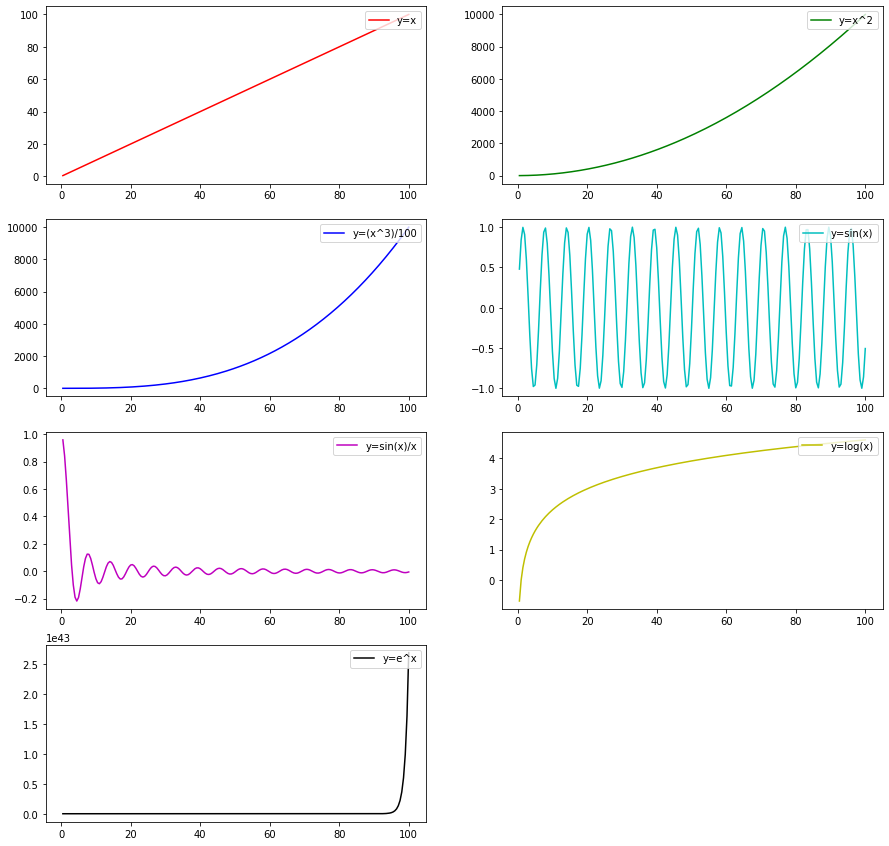

In [ ]:
n_rows = 4 #rows
n_cols = 2 #cols
fig = plt.figure(figsize=(15,15)) #figure size
labels = ["y=x","y=x^2","y=(x^3)/100","y=sin(x)","y=sin(x)/x","y=log(x)","y=e^x"] # labels
colours = ["r","g","b","c","m","y","k"] # colours
y_s = [y_1, y_2, y_3, y_4, y_5, y_6, y_7] # functions
for i in range(1,8):
  ax = fig.add_subplot(n_rows, n_cols, i)
  ax.plot(x, y_s[i-1],color=colours[i-1],label=labels[i-1])
  ax.legend(loc="upper right")

plt.show()

---

**Q10.** Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
matrix = np.random.rand(20,5) # random.rand generates the matrix with specified size and with values ranging between 0 and 1 uniformly
matrix = matrix + 1 # adding one shifts the values to range between 1 and 2, in a sense the mean of the normal shifts to the right by 1
matrix

array([[1.65989241, 1.91613642, 1.84591264, 1.0444234 , 1.35192695],
       [1.43653756, 1.92157459, 1.35038543, 1.52314724, 1.47533867],
       [1.23651099, 1.27905396, 1.51430363, 1.65511116, 1.52989035],
       [1.52796807, 1.84179502, 1.94617662, 1.12876459, 1.90802618],
       [1.80107625, 1.54582153, 1.71988637, 1.93299545, 1.90198081],
       [1.89749984, 1.05846845, 1.67687079, 1.49186583, 1.3984107 ],
       [1.75417357, 1.40430308, 1.453799  , 1.44441146, 1.57148172],
       [1.16208164, 1.73198677, 1.65265912, 1.70321519, 1.38762836],
       [1.36973822, 1.31536225, 1.81576464, 1.10944487, 1.80767071],
       [1.79354174, 1.56314152, 1.70220185, 1.48245482, 1.07485604],
       [1.75956648, 1.38386635, 1.81069268, 1.65930474, 1.80709796],
       [1.23906591, 1.94041737, 1.70034002, 1.31132553, 1.73963787],
       [1.32218861, 1.01610193, 1.05124622, 1.54537603, 1.96716357],
       [1.66532124, 1.60677284, 1.22184024, 1.68390827, 1.50605849],
       [1.06368313, 1.93302858, 1.

In [ ]:
df = pd.DataFrame(matrix) # converting matrix to dataframe
mapping = {0:"a",1:"b",2:"c",3:"d",4:"e"} 
df.rename(columns = mapping, inplace=True) # renaming the columns
df

,a,b,c,d,e
0,1.659892,1.916136,1.845913,1.044423,1.351927
1,1.436538,1.921575,1.350385,1.523147,1.475339
2,1.236511,1.279054,1.514304,1.655111,1.529890
3,1.527968,1.841795,1.946177,1.128765,1.908026
4,1.801076,1.545822,1.719886,1.932995,1.901981
5,1.897500,1.058468,1.676871,1.491866,1.398411
6,1.754174,1.404303,1.453799,1.444411,1.571482
7,1.162082,1.731987,1.652659,1.703215,1.387628
8,1.369738,1.315362,1.815765,1.109445,1.807671
9,1.793542,1.563142,1.702202,1.482455,1.074856


In [ ]:
print(f"Highest standard-deviation across columns is {df.std(axis=0).max()} and the corresponding column is {chr(97+df.std(axis=0).argmax())}.")
# std returns the standard deviation across the axis specified, in our case along axis 0 corresponds to columns
# chr returns the char of the ASCII value inside, argmax returns the index of the column with highest standard deviation

Highest standard-deviation across columns is 0.2989733312572613 and the corresponding column is b.


In [ ]:
print(f"Lowest mean across row is {df.mean(axis=1).min()} and the corresponding row is {df.mean(axis=1).argmin()}.")
# mean returns the mean across the axis specified, in our case along axis 1 corresponds to rows
# argmin returns the index of the row with lowest mean

Lowest mean across row is 1.3804152701044086 and the corresponding row is 12.


---

**Q11.** Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [ ]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e'] # creating the new column f
df

,a,b,c,d,e,f
0,1.659892,1.916136,1.845913,1.044423,1.351927,7.818292
1,1.436538,1.921575,1.350385,1.523147,1.475339,7.706983
2,1.236511,1.279054,1.514304,1.655111,1.529890,7.214870
3,1.527968,1.841795,1.946177,1.128765,1.908026,8.352730
4,1.801076,1.545822,1.719886,1.932995,1.901981,8.901760
5,1.897500,1.058468,1.676871,1.491866,1.398411,7.523116
6,1.754174,1.404303,1.453799,1.444411,1.571482,7.628169
7,1.162082,1.731987,1.652659,1.703215,1.387628,7.637571
8,1.369738,1.315362,1.815765,1.109445,1.807671,7.417981
9,1.793542,1.563142,1.702202,1.482455,1.074856,7.616196


In [ ]:
df['g'] = np.where(df['f']<8,"LT8","GT8") # column g
df

,a,b,c,d,e,f,g
0,1.659892,1.916136,1.845913,1.044423,1.351927,7.818292,LT8
1,1.436538,1.921575,1.350385,1.523147,1.475339,7.706983,LT8
2,1.236511,1.279054,1.514304,1.655111,1.529890,7.214870,LT8
3,1.527968,1.841795,1.946177,1.128765,1.908026,8.352730,GT8
4,1.801076,1.545822,1.719886,1.932995,1.901981,8.901760,GT8
5,1.897500,1.058468,1.676871,1.491866,1.398411,7.523116,LT8
6,1.754174,1.404303,1.453799,1.444411,1.571482,7.628169,LT8
7,1.162082,1.731987,1.652659,1.703215,1.387628,7.637571,LT8
8,1.369738,1.315362,1.815765,1.109445,1.807671,7.417981,LT8
9,1.793542,1.563142,1.702202,1.482455,1.074856,7.616196,LT8


In [ ]:
count = 0
for i in range(20):
  if df['g'][i]=="LT8":
    count+=1
print(f"The number of rows in the dataframe where the value in the column “g” is “LT8” is {count}")

The number of rows in the dataframe where the value in the column “g” is “LT8” is 15


In [ ]:
# separating the dataframe based on LT8 and GT8
df1 = df[df['g'] == "LT8"]
print(f"The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” is {df1['f'].std(axis=0)}")

The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” is 0.26674095066456277


In [ ]:
df2 = df[df['g'] == "GT8"]
print(f"The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” is {df2['f'].std(axis=0)}")

The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” is 0.30413466152615853


---

**Q12.** Write a small piece of code to explain broadcasting in numpy.

In [ ]:
A = jnp.array([1,3,4,6,3,4,5,6]) 
B = jnp.array([2])
C = A + B
print(C)
print(f"The shape A is {A.shape}, B's shape is {B.shape} and shape of C i.e. resultant matrix's shape is {C.shape}")

# A's shape is a 1x8 dimension array but when added with an array of 1X1 dimension, C's shape is 1x8 only which says that 
# the smaller array is broadcasted to the size of the larger array for addition and to get the final result as a 1x8 array

[3 5 6 8 5 6 7 8]
The shape A is (8,), B's shape is (1,) and shape of C i.e. resultant matrix's shape is (8,)


---

**Q13.** Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
def find_argmin(array):
  min_index = 0
  min_element = array[0]
  for i in range(len(array)):
    if(array[i]<min_element): # updation if we find a element less that the current minimum element which is array[i]
      min_index = i
      min_element = array[i]
  return min_index

In [ ]:
A = jnp.array([1,5,7,4,34,5,89,0,4,32])
print(find_argmin(A),np.argmin(A))
# Our implementation of the argmin function is correct as the result matches with the inbuilt function.
# The lowest element is at index 7 which is 0.

7 7


## End of Assignment